**Dataset**: Spotify-2000

<span style="color:#fc0339;font-weight:bold;font-size:15px">Bundan sonraki bütün açıklamalar Türkçe olacaktır(başlıklar hariç). Bu Jupyter Notebook dosyası Turkcell Zeka Gücü Yapay Zeka Maratonu kapsamında hazırlanan bir projenin bir parçasıdır.</span>

In [1]:
#Gerekli bazı kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

Face Emotion Detection(CNN)-Made In Colab.ipynb
Music Emotions Detection.ipynb
Speech Emotion Detection(CNN)-Made In Kaggle.ipynb
Spotify-2000.csv
application.py
data_paths.csv
database.db
music.csv
music_model.pkl
my_face_model.h5
voice_model.h5


In [3]:
df=pd.read_csv("Spotify-2000.csv")

In [4]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
#Gerekli olmayan sütunlar silindi.
df=df.drop(["Index","Title","Artist","Top Genre","Year"],axis=1)

In [6]:
df.tail()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1989,94,21,70,-12,11,72,128,84,7,63
1990,175,76,36,-8,76,95,136,73,6,69
1991,168,80,53,-9,31,97,162,74,7,74
1992,174,26,45,-13,7,60,324,54,4,65
1993,133,50,49,-10,16,83,148,74,3,56


In [7]:
df=df.drop(["Valence"],axis=1)

In [8]:
df=df.drop(["Length (Duration)"],axis=1)

In [9]:
df.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,94,3,71
1,135,79,50,-11,17,17,7,39
2,168,69,66,-9,7,2,17,69
3,173,96,43,-4,3,0,4,76
4,106,82,58,-5,10,1,3,59


In [10]:
#Verilerin önem durumuna göre öne çıkarılması veya düşürülmesi
df["Energy"]=df["Energy"]*2
df["Danceability"]=df["Danceability"]*2
df["Loudness (dB)"]=df["Loudness (dB)"]*-1
df["Popularity"]=df["Popularity"]/2
df["Speechiness"]=df["Speechiness"]*2

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
#7 tane küme oluşturuluyor çünkü 7 tane duyguya gerek var. Normalde Elbow(Dirsek) metodu uygulanarak küme sayısı belirlenir.
model=KMeans(n_clusters=7)
model=model.fit(df)

In [13]:
prediction=model.predict(df)

In [14]:
df["cluster"]=prediction

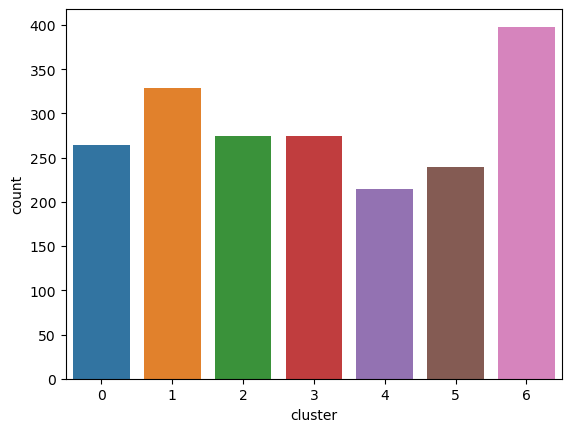

In [15]:
sns.countplot(x="cluster",data=df)
plt.show()

In [16]:
silhouette_score(df,prediction)

0.17847647388638427

In [17]:
d={0:"Neutral",1:"Angry",2:"Sad",3:"Happy",4:"Fear",5:"Disgust",6:"Surprise"}
df["emotion"]=df["cluster"].map(d)

In [18]:
df.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Acousticness,Speechiness,Popularity,cluster,emotion
0,157,60,106,14,11,94,6,35.5,5,Disgust
1,135,158,100,11,17,17,14,19.5,3,Happy
2,168,138,132,9,7,2,34,34.5,1,Angry
3,173,192,86,4,3,0,8,38.0,3,Happy
4,106,164,116,5,10,1,6,29.5,6,Surprise


In [19]:
emotions=df[["emotion","cluster"]]

In [20]:
df=pd.read_csv("Spotify-2000.csv")

In [21]:
df=pd.concat([df,emotions],axis=1)

In [22]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,emotion,cluster
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Disgust,5
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Happy,3
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Angry,1
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Happy,3
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Surprise,6


In [23]:
#Dosyanın kaydedilmesi
df.to_csv("music.csv")

In [24]:
#Modelin kaydedilmesi
import pickle
with open('music_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [25]:
with open('music_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)


KMeans(n_clusters=7)
